In [231]:
import pandas as pd 
import numpy as np 
import folium 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement
from shapely.geometry import Point, Polygon

data = pd.read_csv('obs_data.csv')

In [232]:
# Display the shape of the dataset
print("Shape of dataset:", data.shape)
print("-----------------------------------------------")


Shape of dataset: (2401, 6)
-----------------------------------------------


In [233]:
# Display the first few rows of the dataset
print("First few rows of dataset:")
print(data.head())
print("-----------------------------------------------")

First few rows of dataset:
                                     Id            Date and Time  \
0  EE36CD18-C241-4D99-8AE6-F742E338F762  2023-07-31 08:27:45.673   
1  82762245-A1A0-4B6F-A398-6173B6753D35  2023-07-31 08:29:37.313   
2  02DB09EF-259F-42AE-8B6D-82CF57F09F97  2023-07-31 08:36:16.013   
3  D286127D-3CDB-4139-844A-2C8F83EE6DC1  2023-07-31 08:40:48.107   
4  CD5A0B06-0809-46D8-AA07-E5CEBA4E1637  2023-07-31 14:12:05.247   

                                Location  \
0  51.84798068852703, 0.7235662347445372   
1  51.84798068852703, 0.7235662347445372   
2  51.84798068852703, 0.7235662347445372   
3  51.84798068852703, 0.7235662347445372   
4                                    NaN   

                                          Category Admin close out comment  \
0           Environment - Pollution - Water course                     NaN   
1  Environment - Resources (energy/water/material)                     NaN   
2  Environment - Resources (energy/water/material)               

In [234]:
# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())
print("-----------------------------------------------")

Missing values in dataset:
Id                            0
Date and Time                 0
Location                    440
Category                      0
Admin close out comment    1416
Sentiment                     6
dtype: int64
-----------------------------------------------


In [235]:
# Calculate summary statistics
print("Summary statistics of dataset:")
print(data.describe())

Summary statistics of dataset:
                                          Id            Date and Time  \
count                                   2401                     2401   
unique                                  1939                     1939   
top     FF32DFA2-4A93-4957-902A-D6E38A8CC2B4  2023-11-02 08:33:16.130   
freq                                       4                        4   

                    Location               Category Admin close out comment  \
count                   1961                   2401                     985   
unique                  1100                     43                     795   
top     51.510445, -0.089124  Safety - Housekeeping           Good practice   
freq                      80                    377                      87   

       Sentiment  
count       2395  
unique         2  
top       Hazard  
freq        1372  


In [236]:
data = data[data['Location'].notna()]

In [237]:
print(data.isnull().sum(), data.shape)

Id                            0
Date and Time                 0
Location                      0
Category                      0
Admin close out comment    1166
Sentiment                     6
dtype: int64 (1961, 6)


In [238]:
data[['latitude', 'longitude']] = data['Location'].str.split(', ', expand=True)

data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')

data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

data = data.drop(['Location'], axis=1)

data.head()

,Id,Date and Time,Category,Admin close out comment,Sentiment,latitude,longitude
0,EE36CD18-C241-4D99-8AE6-F742E338F762,2023-07-31 08:27:45.673,Environment - Pollution - Water course,NaN,Good Practice,51.847981,0.723566
1,82762245-A1A0-4B6F-A398-6173B6753D35,2023-07-31 08:29:37.313,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566
2,02DB09EF-259F-42AE-8B6D-82CF57F09F97,2023-07-31 08:36:16.013,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566
3,D286127D-3CDB-4139-844A-2C8F83EE6DC1,2023-07-31 08:40:48.107,Environment - Ecology and Vegetation,NaN,Good Practice,51.847981,0.723566
5,66E72903-B1F2-4275-9D16-0E3D8B98A257,2023-08-01 07:25:42.810,Environment - Archaeology / Heritage,NaN,Hazard,51.847673,0.735153


In [239]:
data['Date and Time'] = pd.to_datetime(data['Date and Time'])

data['Date'] = data['Date and Time'].dt.date

data['Time'] = data['Date and Time'].dt.hour

data = data.drop(['Date and Time'], axis=1)

data.head()

,Id,Category,Admin close out comment,Sentiment,latitude,longitude,Date,Time
0,EE36CD18-C241-4D99-8AE6-F742E338F762,Environment - Pollution - Water course,NaN,Good Practice,51.847981,0.723566,2023-07-31,8
1,82762245-A1A0-4B6F-A398-6173B6753D35,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566,2023-07-31,8
2,02DB09EF-259F-42AE-8B6D-82CF57F09F97,Environment - Resources (energy/water/material),NaN,Good Practice,51.847981,0.723566,2023-07-31,8
3,D286127D-3CDB-4139-844A-2C8F83EE6DC1,Environment - Ecology and Vegetation,NaN,Good Practice,51.847981,0.723566,2023-07-31,8
5,66E72903-B1F2-4275-9D16-0E3D8B98A257,Environment - Archaeology / Heritage,NaN,Hazard,51.847673,0.735153,2023-08-01,7


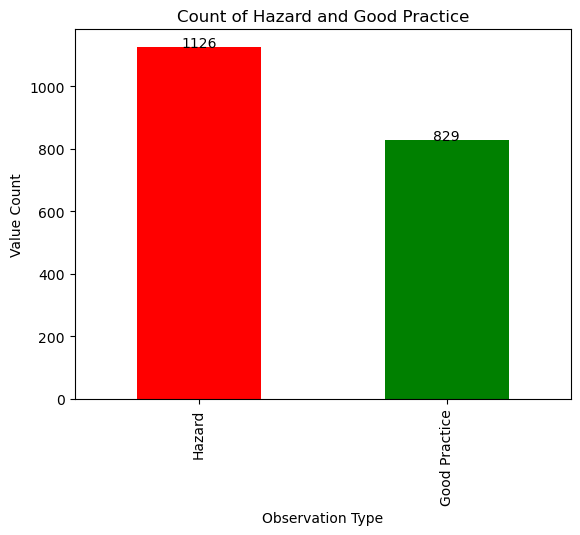

In [240]:
obs_type = data.Sentiment.value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Count of Hazard and Good Practice')
plt.xlabel('Observation Type')
plt.ylabel('Value Count')

for i, j in enumerate(data.Sentiment.value_counts()):
    obs_type.text(i, j + 0.1, str(j), color='black', ha='center')

Text(0, 0.5, 'Value Count')

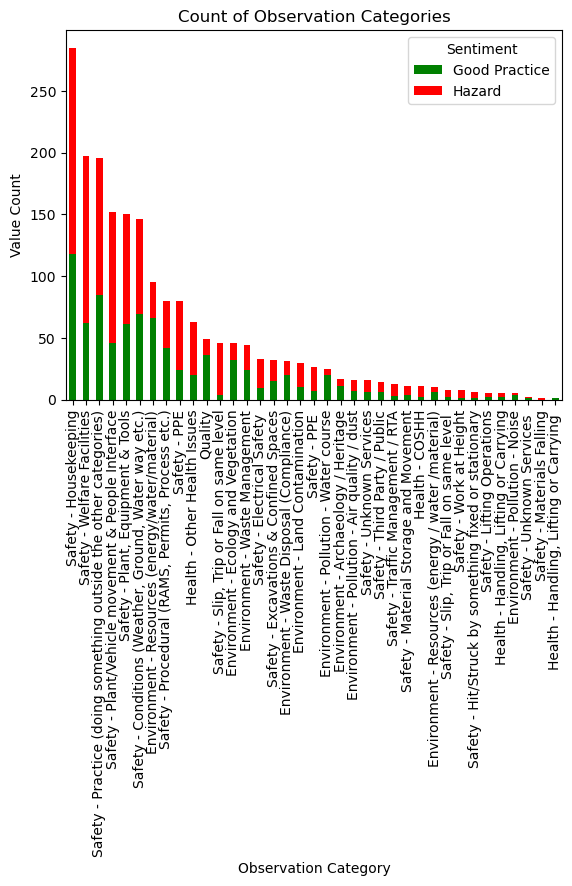

In [241]:
category_count_with_type = pd.crosstab(data.Category, data.Sentiment)

category_count_with_type = category_count_with_type.loc[category_count_with_type.sum(axis=1).sort_values(ascending=False).index]


category = category_count_with_type.plot(kind='bar', color=['green', 'red'], stacked=True)
plt.title('Count of Observation Categories')
plt.xlabel('Observation Category')
plt.ylabel('Value Count')


In [242]:
map_centre = [data.latitude.iloc[0], data.longitude.iloc[0]]

obs_map = folium.Map(location=map_centre, zoom_start=10)

for index, row in data.iterrows():
    color = 'green' if row.Sentiment == 'Good Practice' else 'red'
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color=color)
        
    ).add_to(obs_map)

obs_map

### Cluster by Time of Day

In [243]:
data_sum_of_squares = []

X = data[['Time']]

for item in range(1, 10):
    kmeans_cluster = KMeans(n_clusters=item, random_state=1)
    kmeans_cluster.fit(X)
    data_sum_of_squares.append(kmeans_cluster.inertia_)

c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

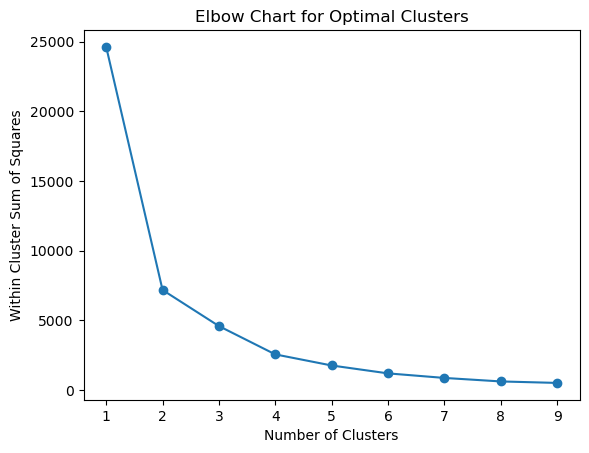

In [244]:
plt.plot(range(1, 10), data_sum_of_squares, marker='o')
plt.title('Elbow Chart for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [245]:
clusters = 4

clustering = KMeans(n_clusters=clusters, random_state=1)
data['Cluster'] = clustering.fit_predict(X)




c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='count'>

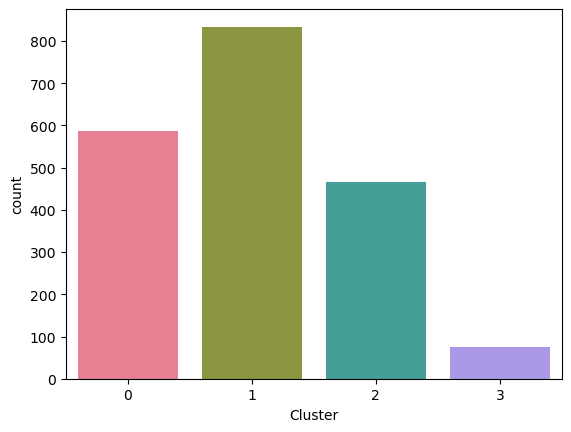

In [246]:
cluster_colours = sns.color_palette('husl', n_colors=clusters)


fig, ax = plt.subplots()
sns.countplot(x='Cluster', data=data, palette=cluster_colours)

In [ ]:

my_map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(my_map)

for cluster in data['Cluster'].unique():
    subset = data[data['Cluster'] == cluster]
    for index, row in subset.iterrows():
        location = [row['latitude'], row['longitude']]
        popup = f"Cluster: {cluster}, Time: {row['Time']}"
        folium.Marker(location=location, popup=popup).add_to(marker_cluster)

my_map

In [ ]:
# cluster_colours = {0: 'red', 1: 'blue', 2: 'green'}
# data['Colour'] = data['Cluster'].map(cluster_colours)

# map_centre = [data['latitude'].mean(), data['longitude'].mean()]

# cluster_map = folium.Map(location=map_centre, zoom_start=12)

# for index, row in data.iterrows():
#     popup_text = f"Cluster - {row['Cluster']} \n\n\n Hour of Day - {row['Time']}"
    
#     folium.Circle([row['latitude'], row['longitude']], color=row['Colour'], fill=True, fill_color=row['Colour'], popup=folium.Popup(popup_text, parse_html=True)).add_to(cluster_map)

# legend_html = """
#     <div style="position: fixed; 
#                 bottom: 50px; left: 50px; width: 150px; height: 90px; 
#                 border:2px solid grey; z-index:9999; font-size:14px;
#                 background-color:white;
#                 ">
#         <p style="margin:5px; background-color:red; color:white">Cluster 0</p>
#         <p style="margin:5px; background-color:blue; color:white">Cluster 1</p>
#         <p style="margin:5px; background-color:green; color:white">Cluster 2</p>
#     </div>
#     """
# cluster_map.get_root().html.add_child(folium.Element(legend_html))
    
# cluster_map

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


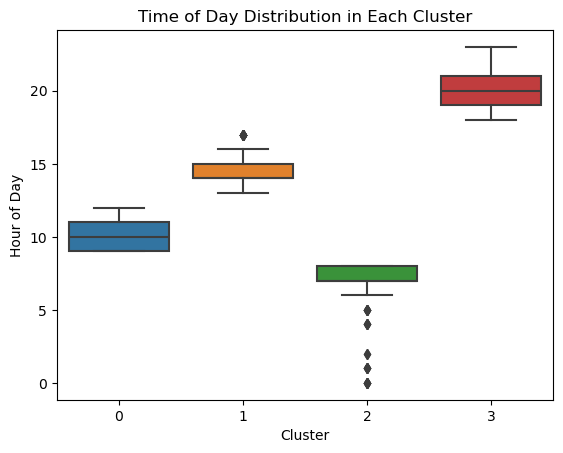

In [249]:
sns.boxplot(x='Cluster', y='Time', data=data)
plt.title('Time of Day Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Hour of Day')
plt.show()

In [ ]:
# cluster_palette = sns.color_palette("husl", n_colors=clusters)
# data['cluster_color'] = data['Cluster'].map({cluster: cluster_palette[cluster] for cluster in range(clusters)})


# def get_time_of_day_label(hour):
#     if 6 <= hour < 12:
#         return 'Morning'
#     elif 12 <= hour < 18:
#         return 'Afternoon'
#     else:
#         return 'Evening/Night'


# for index, row in data.iterrows():
#     location = [row['latitude'], row['longitude']]
#     popup = f"Cluster: {row['Cluster']}, Time of Day: {get_time_of_day_label(row['Time'])}"
    
#     folium.Marker(
#         location=location,
#         popup=popup,
#         icon=None,  # No specific icon for individual markers
#         color=row['cluster_color']
#     ).add_to(marker_cluster)

# # Add Legend using HTML
# legend_html = """
# <div style="position: fixed; bottom: 50px; left: 50px; background-color: white; padding: 10px; border: 2px solid grey; z-index: 1000;">
# <b>Cluster Legend</b><br>
# <i style="background: red; width: 20px; height: 20px; display: inline-block;"></i> Cluster 0<br>
# <i style="background: green; width: 20px; height: 20px; display: inline-block;"></i> Cluster 1<br>
# <i style="background: blue; width: 20px; height: 20px; display: inline-block;"></i> Cluster 2<br>
# </div>
# """

# legend = MacroElement()
# legend._template = Template(legend_html)
# my_map.get_root().add_child(legend)

# # Display the map in the notebook
# my_map


### Plotting counts by good and bad practice across time

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: xlabel='Time', ylabel='count'>

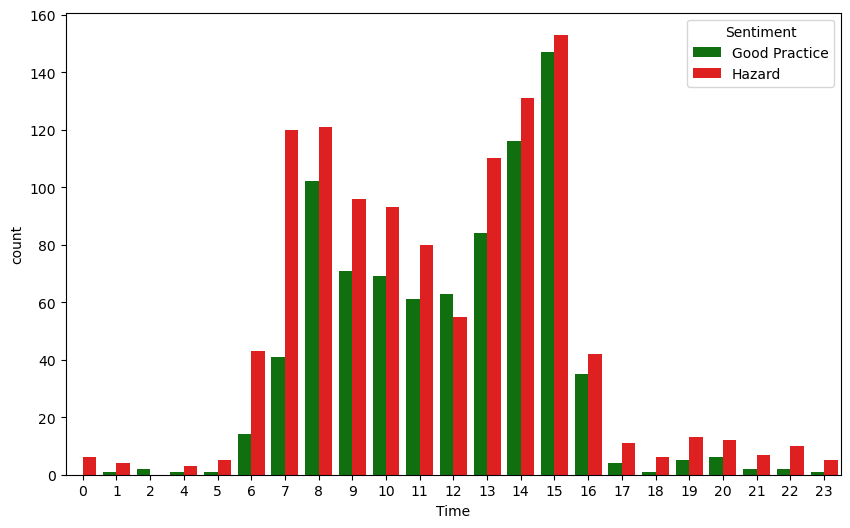

In [251]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Time', hue='Sentiment', data=data, palette={'Hazard': 'red', 'Good Practice': 'green'})

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

Text(0.5, 1.0, 'Count of Hazard Observations by Time of Day')

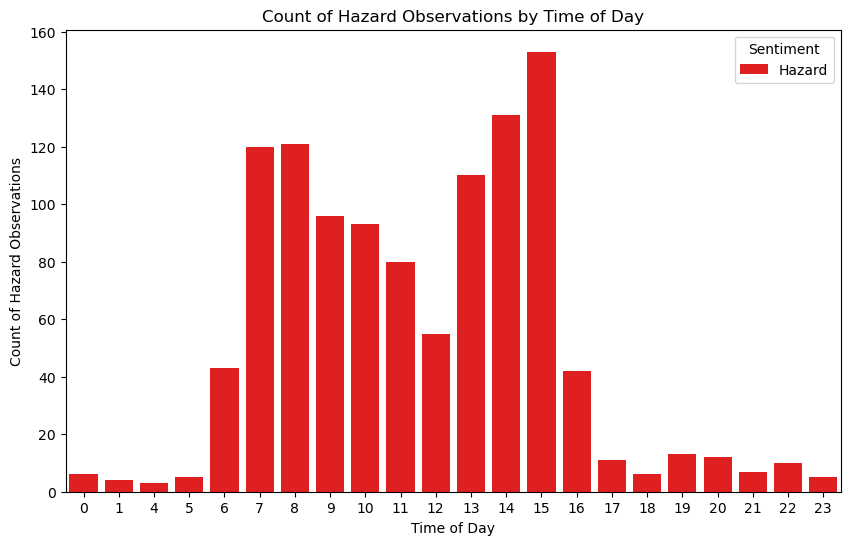

In [252]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Time', hue='Sentiment', data=data[data['Sentiment'] == 'Hazard'], palette={'Hazard': 'red'})

plt.xlabel('Time of Day')
plt.ylabel('Count of Hazard Observations')
plt.title('Count of Hazard Observations by Time of Day')

In [253]:
# from sklearn.cluster import DBSCAN

# location_sum_of_squares = []

# X = data[['latitude', 'longitude']]

# for item in range(1, 10):
#     kmeans_cluster = KMeans(n_clusters=item, random_state=1)
#     kmeans_cluster.fit(X)
#     location_sum_of_squares.append(kmeans_cluster.inertia_)
    

# plt.plot(range(1, 10), location_sum_of_squares, marker='o')
# plt.title('Elbow Chart for Optimal Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Within Cluster Sum of Squares')
# plt.show()

In [254]:
# no_of_clusters = 10

# location_cluster = DBSCAN(eps=0.4, min_samples=no_of_clusters)



# data['LocationCluster'] = location_cluster.fit_predict(X)

In [255]:
# cluster_colours = sns.color_palette('husl', n_colors=no_of_clusters)


# fig, ax = plt.subplots()
# sns.countplot(x='LocationCluster', data=data, palette=cluster_colours)

In [256]:
# min_cluster_size = 30
# cluster_counts = data['LocationCluster'].value_counts()
# clusters_to_keep = cluster_counts[cluster_counts >= min_cluster_size].index
# filtered_data = data[data['LocationCluster'].isin(clusters_to_keep)]

# plt.figure(figsize=(8, 6))
# plt.scatter(filtered_data['latitude'], filtered_data['longitude'], c=filtered_data['LocationCluster'], cmap='viridis', edgecolors='k', s=100)
# plt.title('Clustering Observations by Latitude and Longitude')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.show()

In [257]:
# map_center = [data['latitude'].mean(), data['longitude'].mean()]
# my_map = folium.Map(location=map_center, zoom_start=10)

# cluster_colors = {
#     -1: 'gray',  # Assign a color for outliers (cluster -1)
#     0: 'blue',
#     1: 'red',
#     2: 'green',
#     # Add more colors as needed
# }


# marker_cluster = MarkerCluster().add_to(my_map)


# for index, row in data.iterrows():
#     location = [row['latitude'], row['longitude']]
#     cluster_id = row['LocationCluster']
    
#     folium.Marker(
#         location=location,
#         popup=f"Cluster: {row['LocationCluster']}, Observation: {row['Category']}",
#         icon=None,
#         color=cluster_colors.get(cluster_id)
#     ).add_to(marker_cluster)



# # Create a custom HTML legend
# legend_html = """
#      <div style="position: fixed; 
#                  bottom: 10px; left: 10px; width: 120px; height: 90px; 
#                  border:2px solid grey; z-index:9999; font-size:12px;
#                  background-color:white;
#                  ">
#      &nbsp; Cluster Legend <br>
#      &nbsp; Cluster -1 &nbsp; <i class="fa fa-circle" style="color:gray"></i><br>
#      &nbsp; Cluster 0 &nbsp; <i class="fa fa-circle" style="color:blue"></i><br>
#      &nbsp; Cluster 1 &nbsp; <i class="fa fa-circle" style="color:red"></i><br>
#      &nbsp; Cluster 2 &nbsp; <i class="fa fa-circle" style="color:green"></i><br>
#      </div>
#      """

# # Add legend to the map
# my_map.get_root().html.add_child(folium.Element(legend_html))


# my_map

### Plotting top 3 categories by each hour

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: xlabel='Time', ylabel='count'>

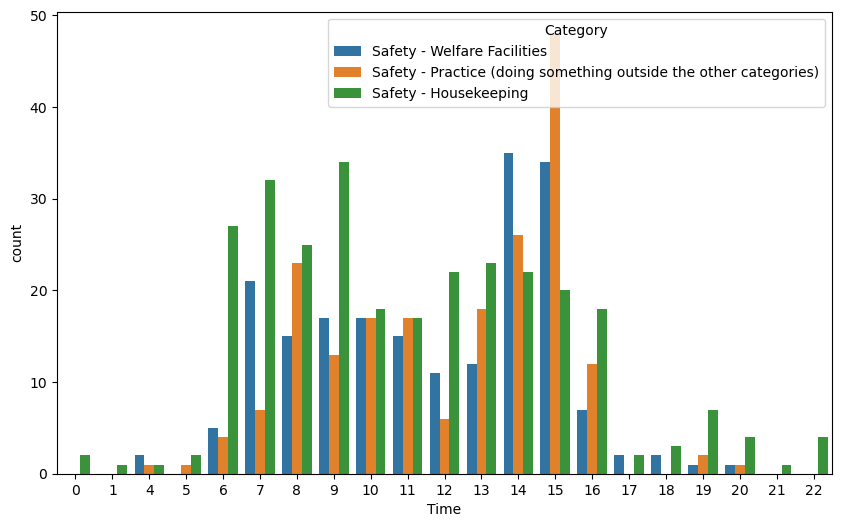

In [258]:
plt.figure(figsize=(10, 6))

top_observations = data['Category'].value_counts().nlargest(3).index

top_observations_dataframe = data[data['Category'].isin(top_observations)]

sns.countplot(x='Time', hue='Category', data=top_observations_dataframe, )#, palette={'Hazard': 'red', 'Good Practice': 'green'})

# print(data['Category'].unique())





### Top 5 hazardous hours across the day

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Time', ylabel='count'>

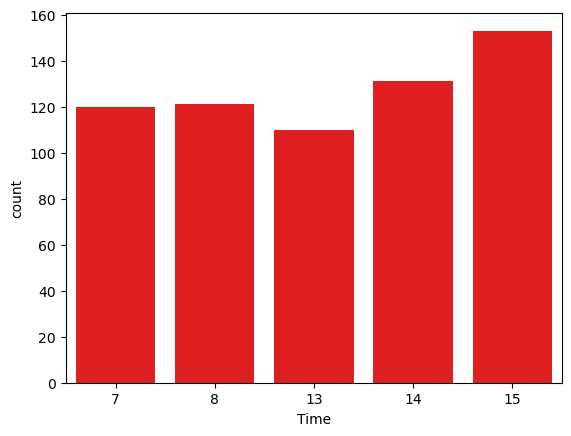

In [259]:
hazard_dataframe = data[data['Sentiment'] == 'Hazard']

top_hazards = hazard_dataframe['Time'].value_counts().nlargest(5).index

filtered_hazard_dataframe = hazard_dataframe[hazard_dataframe['Time'].isin(top_hazards)]

sns.countplot(x='Time', data=filtered_hazard_dataframe, color='red')

<Axes: xlabel='Time'>

<Figure size 1000x600 with 0 Axes>

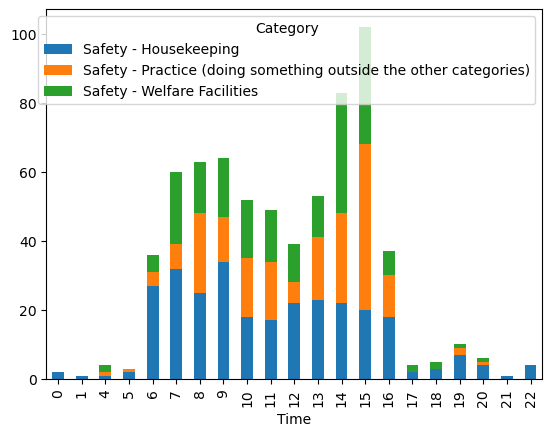

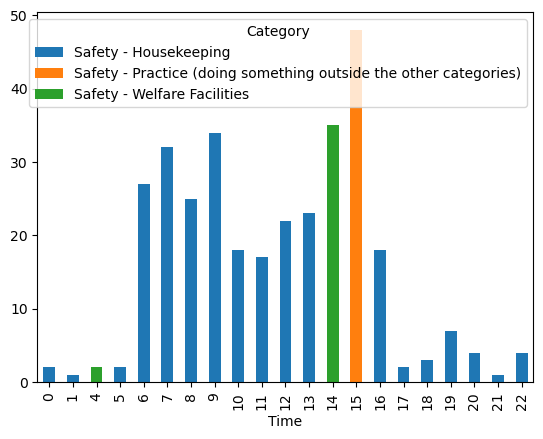

In [260]:
plt.figure(figsize=(10, 6))

top_observations = data['Category'].value_counts().nlargest(3).index

top_observations_dataframe = data[data['Category'].isin(top_observations)]

# top_observations_dataframe_sorted = top_observations_dataframe.sort_values(by=['Time', 'Category'], ascending=[True, False])

hourly_category_counts = top_observations_dataframe.groupby(['Time', 'Category']).size().reset_index(name='Count')

# Order the bars based on both time of day and category count

idx_max_count = hourly_category_counts.groupby('Time')['Count'].idxmax()

top_category_per_hour = hourly_category_counts.loc[idx_max_count]

top_category_pivot = top_category_per_hour.pivot(index='Time', columns='Category', values='Count')

top_three_categories_per_hour = hourly_category_counts.groupby('Time').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

top_three_categories_per_hour = top_three_categories_per_hour.sort_values(by=['Time', 'Count'], ascending=[True, False])

top_three_pivot = top_three_categories_per_hour.pivot(index='Time', columns='Category', values='Count')

top_three_pivot.plot(kind='bar', stacked=True)

# sns.countplot(x='Time', y='Count', hue='Category', data=top_category_per_hour, dodge=True)

top_category_pivot.plot(kind='bar', stacked=True)

# print(data['Category'].unique())





### Cluster only hazards by time of day

In [264]:
hazard_data = data[data['Sentiment'] == 'Hazard']

hazard_kmeans = KMeans(n_clusters=4)

hazard_data['Cluster'] = hazard_kmeans.fit_predict(hazard_data[['Time']])

c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Chris Henry\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Chris Henry\AppData\Local\Temp\ipykernel_122740\3057675349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hazard_data['Cluster'] = hazard_kmeans.fit_predict(hazard_d

In [265]:
cluster_colours = {0: 'red', 1: 'blue', 2: 'green'}
hazard_data['Colour'] = hazard_data['Cluster'].map(cluster_colours)

map_centre = [hazard_data['latitude'].mean(), hazard_data['longitude'].mean()]

cluster_map = folium.Map(location=map_centre, zoom_start=12)

for index, row in hazard_data.iterrows():
    popup_text = f"Cluster - {row['Cluster']} \n\n\n Hour of Day - {row['Time']}"
    
    folium.Circle([row['latitude'], row['longitude']], color=row['Colour'], fill=True, fill_color=row['Colour'], popup=folium.Popup(popup_text, parse_html=True)).add_to(cluster_map)

legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 90px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white;
                ">
        <p style="margin:5px; background-color:red; color:white">Cluster 0</p>
        <p style="margin:5px; background-color:blue; color:white">Cluster 1</p>
        <p style="margin:5px; background-color:green; color:white">Cluster 2</p>
    </div>
    """
cluster_map.get_root().html.add_child(folium.Element(legend_html))
    
cluster_map

C:\Users\Chris Henry\AppData\Local\Temp\ipykernel_122740\3101352338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hazard_data['Colour'] = hazard_data['Cluster'].map(cluster_colours)


c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster', ylabel='count'>

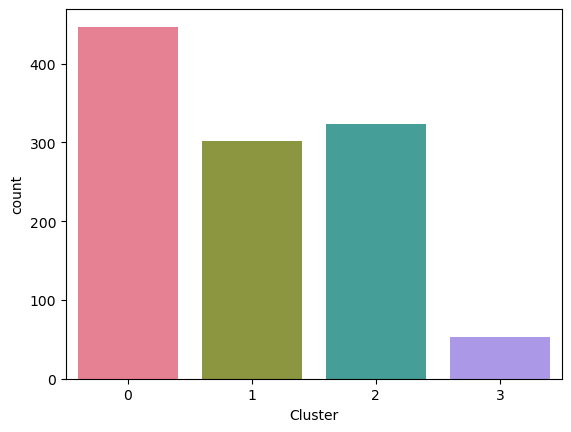

In [266]:
cluster_colours = sns.color_palette('husl', n_colors=clusters)


fig, ax = plt.subplots()
sns.countplot(x='Cluster', data=hazard_data, palette=cluster_colours)

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


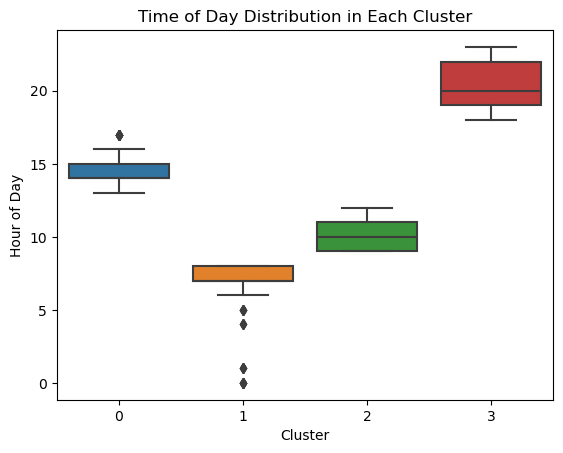

In [268]:
sns.boxplot(x='Cluster', y='Time', data=hazard_data)
plt.title('Time of Day Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Hour of Day')
plt.show()

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


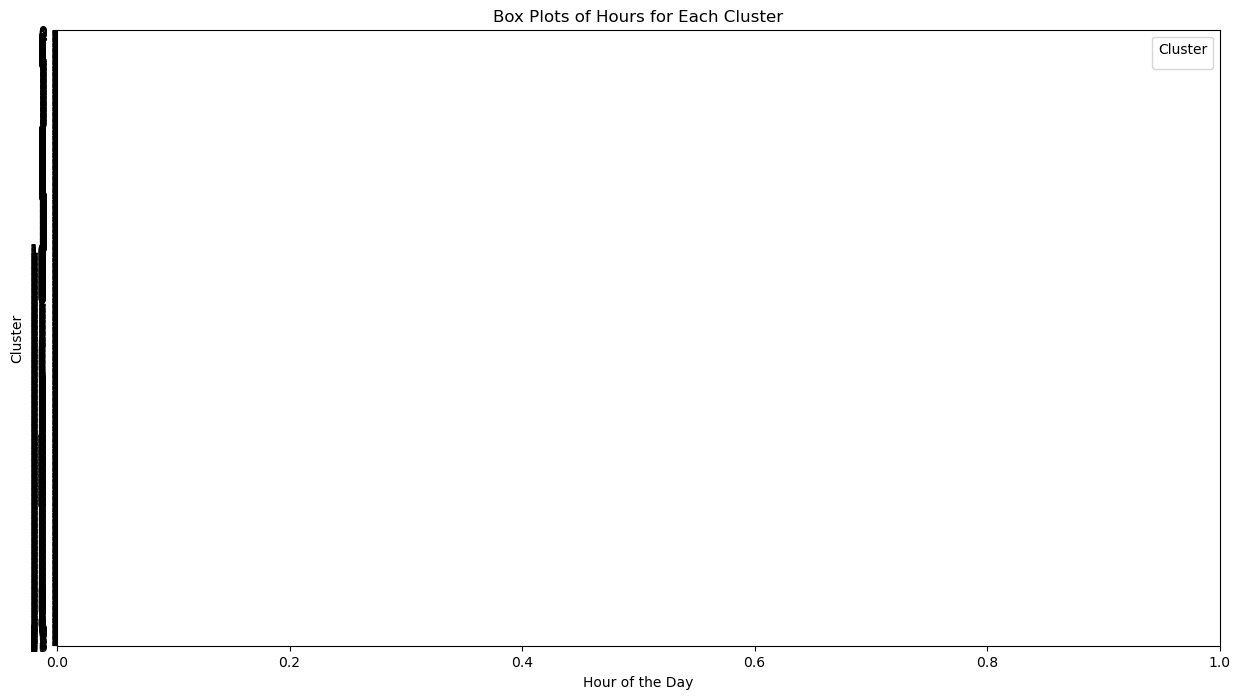

In [271]:
plt.figure(figsize=(15, 8))

sns.boxplot(x='Time', y='Category', data=hazard_data, palette='viridis', order=sorted(hazard_data['Time']), linewidth=2)
plt.title('Box Plots of Hours for Each Cluster')
plt.xlabel('Hour of the Day')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()